# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#чтение таблицы
data = pd.read_excel('geo_comment.xlsx', sheet_name = 'Sheet1', index_col = 0, header = 0)

In [3]:
data.info(); data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70382 entries, 0 to 70381
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   x              70382 non-null  float64
 1   y              70382 non-null  float64
 2   comment_class  70382 non-null  int64  
 3   multiplier     70382 non-null  int64  
 4   comment        70382 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 3.2+ MB


,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


----------------- Обязательное задание -----------------------

In [4]:
#проведем кластеризацию: KMeans

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
#отберем нужные признаки
df = data[['x', 'y']]
#нормализуем признаки
df_scaled = StandardScaler().fit_transform(df)
#поищем кластеры
#KMeans, n_clusters = 146 по числу административных районов в г.Москве (после 2012 года включая 21 поселение в ТиНАО)
clusters = KMeans(n_clusters = 146, random_state = 42).fit(df_scaled)

In [6]:
print(clusters.labels_)

[ 76  76  98 ... 104  18  52]


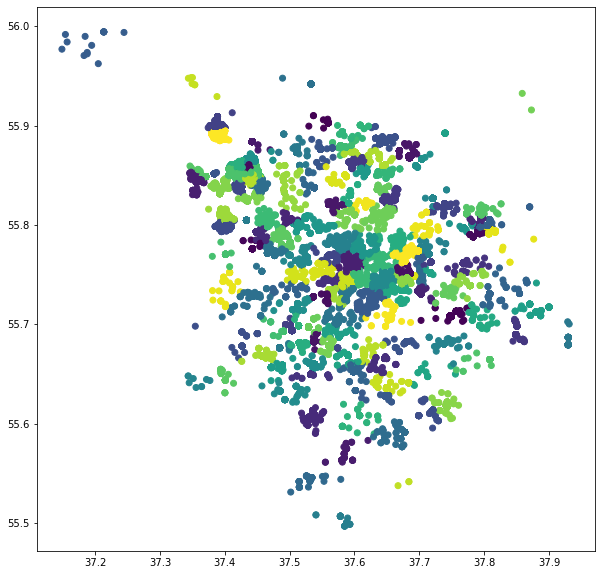

In [7]:
#построим график
plt.figure(figsize=(10,10))
plt.scatter(df['x'], df['y'], c = clusters.labels_)
plt.show()

In [8]:
df = pd.concat([df, pd.DataFrame(clusters.labels_, columns = ['cluster']), data['comment_class']], axis = 1)

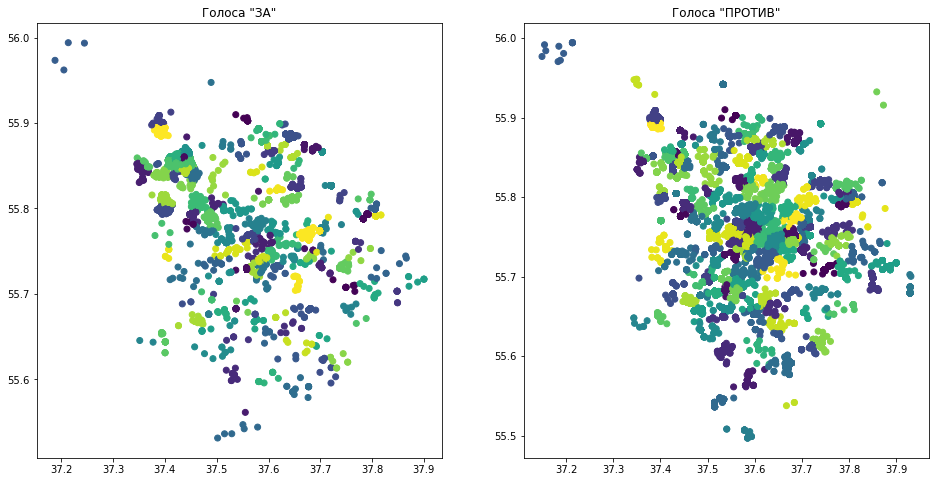

In [9]:
#определим границы фигуры
plt.figure(figsize=(16,8))

#голоса "за"
df_agree = df[df['comment_class'] == 1]
plt.subplot(1, 2, 1), plt.title('Голоса "ЗА"')
plt.scatter(df_agree['x'], df_agree['y'], c = df_agree['cluster'])

#голоса "против"
plt.subplot(1, 2, 2), plt.title('Голоса "ПРОТИВ"')
df_disagree = df[df['comment_class'] == -1]
plt.scatter(df_disagree['x'], df_disagree['y'], c = df_disagree['cluster'])

plt.show()

In [10]:
#ошибка при n_clusters = 146
clusters.inertia_

104.4359079653096

In [11]:
#подберем оптимальное количество кластеров
err_2 = []
clusters_num_list = range(5, 60, 2)
for clusters_num in clusters_num_list:
    err_2.append(KMeans(n_clusters = clusters_num, random_state = 42).fit(df_scaled).inertia_)

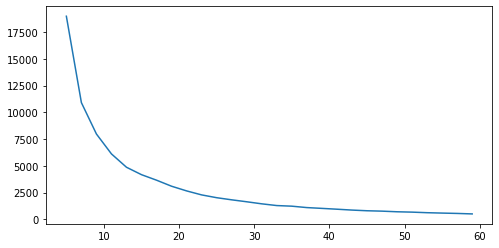

In [12]:
#график изменения ошибки от числа кластеров
plt.figure(figsize=(8,4))
plt.plot(clusters_num_list, err_2)

In [13]:
#динамика убывания ошибки
diff_ = np.diff(err_2)

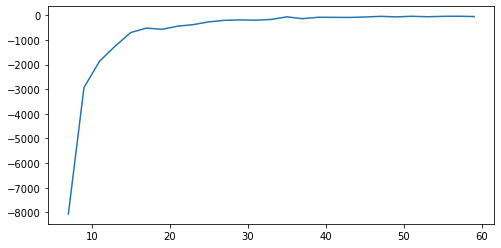

In [14]:
plt.figure(figsize=(8,4))
plt.plot(clusters_num_list[1:], diff_)

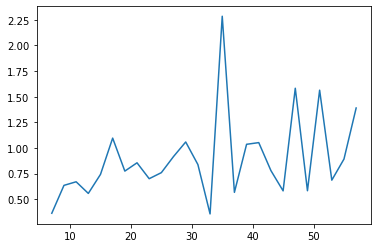

In [15]:
diff_r = diff_[1:] / diff_[:-1]
plt.plot(clusters_num_list[1:-1], diff_r)

In [16]:
k_opt = clusters_num_list[np.argmin(diff_r)+1]
k_opt

33

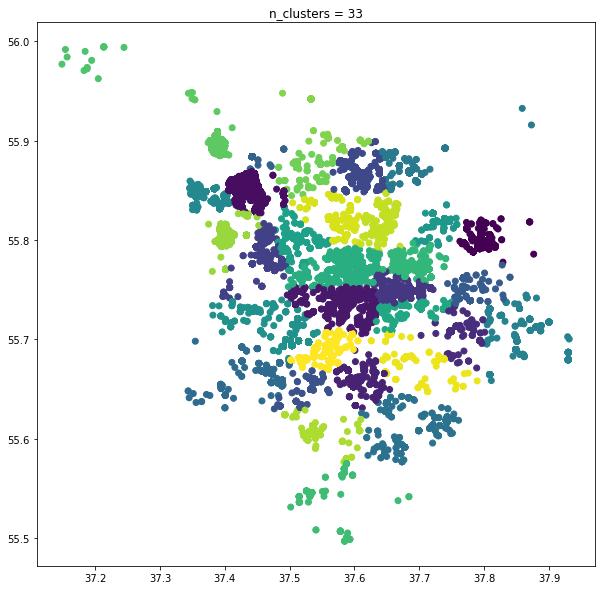

In [17]:
#KMeans, n_clusters =  k_opt
clusters = KMeans(n_clusters = k_opt, random_state = 42).fit(df_scaled)
#построим график
plt.figure(figsize=(10,10)), plt.title('n_clusters = ' + str(k_opt))
plt.scatter(df['x'], df['y'], c = clusters.labels_)
plt.show()

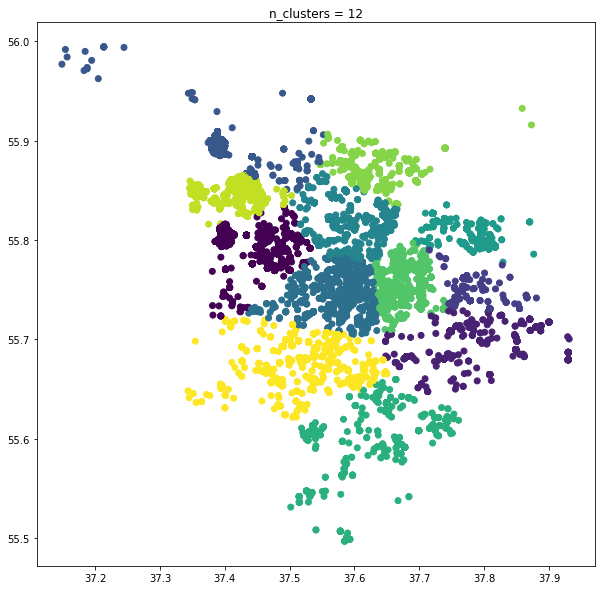

In [18]:
#KMeans, n_clusters =  12 по числу административных округов (после 2012 года включая ТиНАО)
clusters = KMeans(n_clusters = 12, random_state = 42).fit(df_scaled)
#построим график
plt.figure(figsize=(10,10)), plt.title('n_clusters = 12')
plt.scatter(df['x'], df['y'], c = clusters.labels_)
plt.show()

In [19]:
#Ни один из результатов кластеризации мне не нравится, хотя наиболее адекватным выглядит кластеризация по числу
#административных округов г.Москвы.

----------------- Дополнительное задание -----------------------

In [20]:
#наиболее активные в голосовании районы
df = pd.concat([df, data['multiplier']], axis = 1)

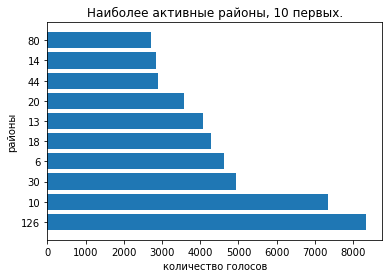

In [21]:
n_best = 10
best_list = df.groupby('cluster')['multiplier'].sum().sort_values(ascending = False)
plt.barh(np.arange(n_best), best_list[:n_best])
plt.yticks(np.arange(n_best), best_list[:n_best].index)
plt.title('Наиболее активные районы, ' + str(n_best) + ' первых.')
plt.xlabel('количество голосов'); plt.ylabel('районы')
plt.show()

In [5]:
from sklearn.cluster import DBSCAN

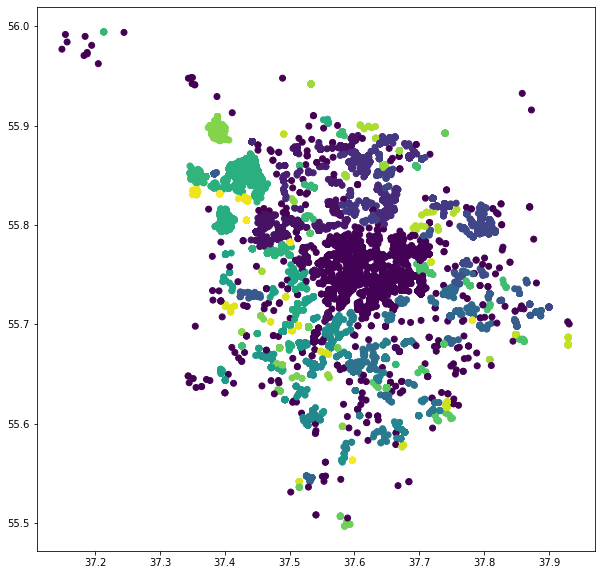

In [23]:
#DBSCAN
db_clusters = DBSCAN(eps = 0.07, min_samples = 5).fit(df_scaled)
#построим график
plt.figure(figsize=(10,10))
plt.scatter(df['x'], df['y'], c = db_clusters.labels_)
plt.show()

In [24]:
#не понял, что нужно сделать с DBSCAN

In [25]:
#тематика сообщений

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
import re

In [28]:
#беру каждое сообщение, очищаю от стоп-слов и знаков пунктуации, привожу слова к нормальной форме
#далее, каждое предложение превращаю в вектор
#далее, ищу кластеры методами KMeans, DBSCAN, OPTICS

In [56]:
%%time
def message_prep(message, stop_words, morph):
    #убираем какую-то служебную последовательность "\xa0"
    message_ = message.replace("\xa0", " ")
    #оставляем только буквы
    message_ = re.sub(r"[^А-Яа-яёЁ ]","", message_)
    #разбиваем на слова
    tokens = word_tokenize(message_)
    #исключаем стопслова
    tokens = [i for i in tokens if (i not in stop_words)]
    #приводим к нормальной форме (parse)
    tokens = list(map(lambda x: morph.parse(x)[0].normal_form, tokens))
    #возвращаем готовый токен сообщения
    return tokens
    
#класс для получения нормальной формы (инфинитива) слова
morph = pymorphy2.MorphAnalyzer()
#подключаем стопслова
stop_words = stopwords.words('russian')

#добавляем в df признак "token"
df['token'] = data['comment'].apply(message_prep, stop_words = stop_words, morph = morph)

CPU times: user 2h 21min 13s, sys: 1min 5s, total: 2h 22min 19s
Wall time: 2h 23min 55s


In [57]:
#сохраним, что получилось, иначе долго пересчитывать
#df.to_csv('df_tokens.csv', index = False)

In [4]:
df = pd.read_csv('df_tokens.csv')

In [5]:
df

,x,y,cluster,comment_class,multiplier,token
0,37.612416,55.777454,76,-1,1,"['в', 'раздел', 'правило', 'землепользование',..."
1,37.612416,55.777454,76,-1,1,"['на', 'основание', 'вступить', 'законный', 'с..."
2,37.603298,55.742108,98,-1,1,"['внести', 'проект', 'правило', 'землепользова..."
3,37.558526,55.728758,5,-1,1,"['учитывать', 'социальный', 'значимость', 'про..."
4,37.566431,55.731794,125,-1,1,"['учитывать', 'социальный', 'значимость', 'про..."
...,...,...,...,...,...,...
70377,37.454528,55.792331,18,-1,1,"['не', 'поддерживать', 'я', 'против', 'строите..."
70378,37.384325,55.899068,28,-1,1,"['не', 'поддерживать', 'не', 'нужный', 'отстой..."
70379,37.421066,55.848756,104,1,1,"['не', 'поддерживать', 'на', 'взгляд', 'необхо..."
70380,37.448509,55.793065,18,-1,1,"['не', 'поддерживать', 'нарушение', 'строитель..."


In [6]:
#получаем векторное представление наших токенов (сообщений)
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
#собираем "корпус" из токенов (текстов) сообщений
corpus = []

def corpus_append(message):
    corpus.append("".join(message))
    
df['token'].apply(corpus_append)

0        None
1        None
2        None
3        None
4        None
         ... 
70377    None
70378    None
70379    None
70380    None
70381    None
Name: token, Length: 70382, dtype: object

In [13]:
corpus[0]

"['в', 'раздел', 'правило', 'землепользование', 'застройка', 'гмосква', 'текстовый', 'часть', 'графический', 'схема', 'необходимо', 'внести', 'изменение', 'земельный', 'участок', 'кадастровый', 'номер', 'адрес', 'первый', 'самотёчный', 'пер', 'вл', 'б', 'пзз', 'территориальный', 'зона', 'исключить', 'земельный', 'участок', 'часть', 'мой', 'общий', 'долевой', 'собственность', 'земельный', 'участок', 'многоквартирный', 'дом', 'а', 'му', 'самотёчный', 'пер', 'площадь', 'квм', 'точка', 'координата', 'ю', 'на', 'основание', 'вступить', 'законный', 'сила', 'судебный', 'решение', 'дело', 'а', 'ничтожность', 'заключить', 'договор', 'аренда', 'земельный', 'участок', 'адресный', 'ориентир', 'й', 'самотёчный', 'пер', 'вл', 'б', 'кадастровый', 'номер']"

In [10]:
#получаем массив векторов наших сообщений
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)
vect = vectors.toarray()

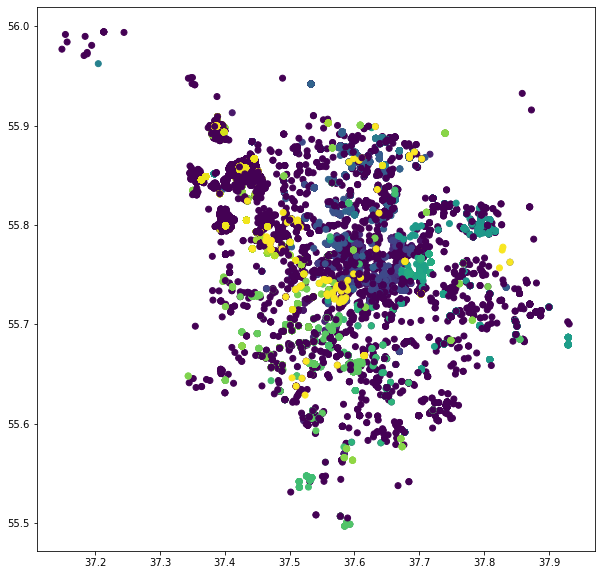

CPU times: user 3h 9min 11s, sys: 16min 41s, total: 3h 25min 52s
Wall time: 1h 58min 40s


In [38]:
%%time
#попробуем определить кластеры в темах сообщений
#признаки - значение векторов
#В1 - DBSCAN
thems_dbscan = DBSCAN(eps = 0.5, min_samples = 5).fit(vect)
#построим график
plt.figure(figsize=(10,10))
plt.scatter(df['x'], df['y'], c = thems_dbscan.labels_)
plt.show()

In [69]:
topics = pd.DataFrame(pd.DataFrame(np.unique(thems_dbscan.labels_, return_counts = True), \
                                   index = ['topic', 'count']).T)

In [83]:
topics.value_counts()

topic  count
-1     8466     1
 396   6        1
 398   10       1
 399   6        1
 400   27       1
               ..
 200   5        1
 201   50       1
 202   33       1
 203   6        1
 602   5        1
Length: 604, dtype: int64

In [81]:
topics.sort_values(by = 'count', ascending = False)[: 16]

,topic,count
0,-1,8466
587,586,4554
155,154,4200
273,272,4124
278,277,3396
165,164,2630
350,349,2622
590,589,2280
369,368,2264
586,585,2058


In [ ]:
#DBSCAN с дефолтными настройками выделил 604 темы сообщений и 12% сообщений "вне выделенных тем"
#нужно подбирать параметры, не уверен, что кластеризация адекватна
#работает очень долго

In [ ]:
%%time
#В2 - KMeans
#подберем оптимальное количество кластеров
err_2 = []
clusters_num_list = [500, 604, 700]

for clusters_num in clusters_num_list:
    err_2.append(KMeans(n_clusters = clusters_num, random_state = 42).fit(vect).inertia_)

diff_ = np.diff(err_2)
diff_r = diff_[1:] / diff_[:-1]

k_opt = clusters_num_list[np.argmin(diff_r)+1]
print(k_opt)

plt.plot(clusters_num_list[1:-1], diff_r)

In [33]:
%%time
#В3 - OPTICS
from sklearn.cluster import OPTICS
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(vect, test_size = 0.9, shuffle = True, random_state = 42)

thems_optics = OPTICS(max_eps = 1., min_samples = 3).fit(X_train)
thems_optics.labels_

CPU times: user 46min 25s, sys: 1min 57s, total: 48min 23s
Wall time: 27min 20s


/Users/ivanpetrov/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


array([ -1,   0,   1, ...,  -1,  -1, 140])

In [34]:
topics_optics = pd.DataFrame(pd.DataFrame(np.unique(thems_optics.labels_, return_counts = True), \
                                          index = ['topic', 'count']).T)
topics_optics

,topic,count
0,-1,1138
1,0,413
2,1,24
3,2,430
4,3,200
...,...,...
206,205,3
207,206,3
208,207,3
209,208,3


In [35]:
topics_optics.sort_values(by = 'count', ascending = False)[: 20]

,topic,count
0,-1,1138
3,2,430
14,13,422
1,0,413
27,26,373
24,23,274
10,9,267
9,8,208
15,14,202
4,3,200


In [ ]:
#алгоритмы KMeans и OPTICS при работе с объемными векторами (более 20000 признаков) не применимы для обработки на
#ноутбуках и тд; так, алгоритм OPTICS при величине тренировочной выборки 56000 векторов (80% всего набора)
#работал 12 часов, после чего сеанс принудительно завершен пользователем
#вероятно, нужно искать другие подходы